In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Part 1

In [2]:
test = np.array(['6,10',
                 '0,14',
                 '9,10',
                 '0,3',
                 '10,4',
                 '4,11',
                 '6,0',
                 '6,12',
                 '4,1',
                 '0,13',
                 '10,12',
                 '3,4',
                 '3,0',
                 '8,4',
                 '1,10',
                 '2,14',
                 '8,10',
                 '9,0',

                 'fold along y=7',
                 'fold along x=5'])

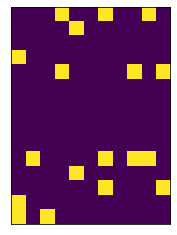

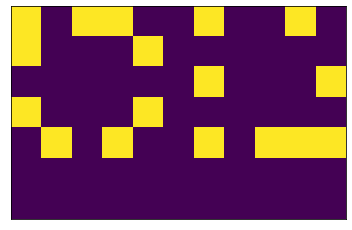

17


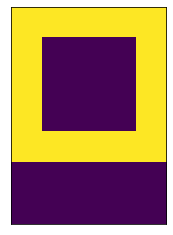

In [3]:
def process_input(data):
    dots = []
    folds = []
    for line in data:
        if 'fold' not in line:
            #switch x and y
            y,x = line.split(',')
            dots.append([int(x),int(y)])
        else:
            line = line[len('fold along '):]
            xy,val = line.split('=')
            folds.append([xy,int(val)])
    dots = np.array(dots)
    max_x = np.max(dots[:,0])+1
    max_y = np.max(dots[:,1])+1
    
    paper = np.zeros((max_x,max_y), dtype=bool)
    for dot in dots:
        paper[dot[0],dot[1]] = True
        
    return paper, folds

def fold_paper(paper, fold):
    if fold[0] == 'y':
        new_paper = paper[:fold[1]]
        otr_paper = paper[fold[1]+1:]
        
        for i in range(0, len(otr_paper)):
            new_paper[-(1+i)] += otr_paper[i]
    
    elif fold[0] == 'x':
        new_paper = paper[:,:fold[1]]
        otr_paper = paper[:,fold[1]+1:]
        
        for i in range(0, len(otr_paper[0])):
            new_paper[:,-(1+i)] += otr_paper[:,i]
            
    return new_paper

paper, folds = process_input(test)
plt.imshow(paper)
plt.xticks([])
plt.yticks([])
plt.show()

paper = fold_paper(paper, folds[0])
plt.imshow(paper)
plt.xticks([])
plt.yticks([])
plt.show()
print(np.sum(paper))

paper = fold_paper(paper, folds[1])
plt.imshow(paper)
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
inpt = np.genfromtxt('day13_input.txt', dtype=str, delimiter='\n')
paper, folds = process_input(inpt)
paper = fold_paper(paper, folds[0])
print('Part 1 Result:', np.sum(paper))

Part 1 Result: 678


# Part 2

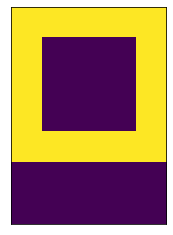

In [5]:
def fully_fold(data):
    paper, folds = process_input(data)
    for i in range(0, len(folds)):
        paper = fold_paper(paper, folds[i])
    plt.imshow(paper)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
fully_fold(test)

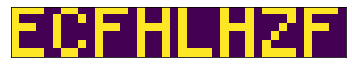

In [6]:
fully_fold(inpt)